In [4]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [5]:
(train_data, train_labels), (test_data, test_labels) = mnist.load_data()

11493376/11490434 [==============================] - 2s 0us/step


In [7]:
train_data.shape, train_labels.shape

((60000, 28, 28), (60000,))

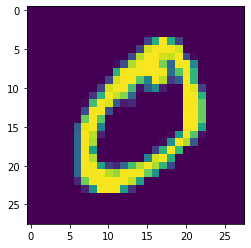

In [10]:
plt.imshow(train_data[1])

In [11]:
train_labels[1]

0

In [26]:
model = models.Sequential()
model.add(layers.Dense(512, activation='relu', input_shape=(28 * 28,)))
model.add(layers.Dense(10, activation='softmax'))

In [27]:
model.compile(
    optimizer='rmsprop',
    loss='categorical_crossentropy',
    metrics='accuracy'
)

In [28]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 512)               401920    
_________________________________________________________________
dense_4 (Dense)              (None, 10)                5130      
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [20]:
x_train = train_data.reshape((60000, 28 * 28))
x_train = x_train.astype('float32') / 255

x_test = test_data.reshape((10000, 28 * 28))
x_test = x_test.astype('float32') / 255

In [22]:
y_train = to_categorical(train_labels)
y_test = to_categorical(test_labels)

In [29]:
model.fit(x_train, y_train, epochs=5, batch_size=128)

Epoch 1/5
469/469 [==============================] - 3s 6ms/step - loss: 0.4335 - accuracy: 0.8720
Epoch 2/5
469/469 [==============================] - 3s 6ms/step - loss: 0.1138 - accuracy: 0.9659
Epoch 3/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0684 - accuracy: 0.9798
Epoch 4/5
469/469 [==============================] - 3s 6ms/step - loss: 0.0507 - accuracy: 0.9848
Epoch 5/5
469/469 [==============================] - 3s 7ms/step - loss: 0.0366 - accuracy: 0.9892


In [30]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.0714 - accuracy: 0.9787


[0.07142264395952225, 0.9786999821662903]